In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import os

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv(r"D:\Python Home Work\ML programming\resume projects\Breast_cancer_data.csv")
df


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [35]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [36]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier()

In [49]:
y_pred=clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


LightGBM Model accuracy score: 0.9298


In [51]:
y_pred_train = clf.predict(X_train)

In [54]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [55]:
print('training set score:{:.4f}',format(clf.score(X_train,y_train)))
    

training set score:{:.4f} 1.0


In [56]:
print('test set score : {:.4f}',format(clf.score(X_test,y_test)))

test set score : {:.4f} 0.9298245614035088


In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [59]:
print('confusion matrix\n\n',cm)
print('\nTrue positives(TP)=',cm[0,0])
print('\nTrue negatives(TN)=',cm[1,1])
print('\nFalse positives(FP)=',cm[0,1])
print('\nFalse negatives(FN)=',cm[1,0])

confusion matrix

 [[ 55   8]
 [  4 104]]

True positives(TP)= 55

True negatives(TN)= 104

False positives(FP)= 8

False negatives(FN)= 4


<Axes: >

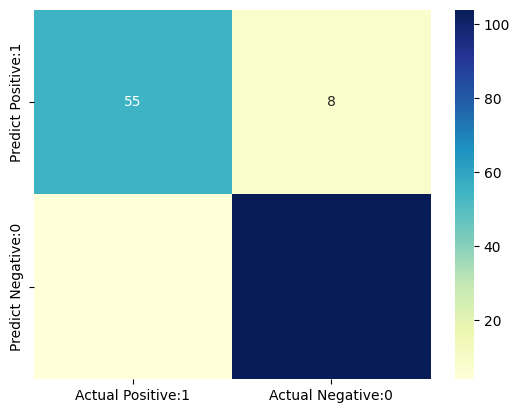

In [60]:
cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1','Actual Negative:0'],index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

